# Petrol/Gas Prices over the World

This project is about analyzing the data of the petrol and gas prices over the world. The aim would be to gain insights regarding the distributions and statistics of certain parameters related to Petrol/Gas trade among countries.

## Downloading the Dataset

The raw dataset contains countries and their daily oil consumptions, world shares, yearly gallons per capita, etc. Using opendatasets library, we will download the dataset from kaggle.

In [168]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [169]:
# Change this
dataset_url = 'https://www.kaggle.com/datasets/zusmani/petrolgas-prices-worldwide' 

In [170]:
import opendatasets as od
od.download(dataset_url)

Skipping, found downloaded files in "./petrolgas-prices-worldwide" (use force=True to force download)


The dataset has been downloaded and extracted.

In [171]:
# Change this
data_dir = './petrolgas-prices-worldwide'

In [172]:
import os
os.listdir(data_dir)

['.ipynb_checkpoints', 'Petrol Dataset June 20 2022.csv']

Let us save and upload our work to Jovian before continuing.

In [173]:
project_name = "petrol_gas_world_prices" # change this (use lowercase letters and hyphens only)

In [174]:
!pip install jovian --upgrade -q

In [175]:
import jovian

In [176]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "therahulbhagat/petrol-gas-world-prices" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/therahulbhagat/petrol-gas-world-prices


'https://jovian.ai/therahulbhagat/petrol-gas-world-prices'

## Data Preparation and Cleaning

We have the raw data, with probably some missing or duplicated values. We need to cleanse the data first so that we can carry out our analysis smoothly.For this we use the regular methods from Pandas to clean our data, but before we can do that we have to load our dataset into a Pandas Dataframe. Let's Begin!

> - Loading the dataset into a data frame using Pandas
> - Exploring the number of rows & columns, ranges of values etc.
> - Handling missing, incorrect and invalid data
> - Performing any additional steps (parsing dates, creating additional columns, merging multiple dataset etc.)

In [177]:
import pandas as pd
import numpy as np

In [178]:
raw_df = pd.read_csv('Petrol Dataset June 23 2022 -- Version 2.csv',encoding = "ISO-8859-1")

In [179]:
raw_df

,S#,Country,Daily Oil Consumption (Barrels),World Share,Yearly Gallons Per Capita,Price Per Gallon (USD),Price Per Liter (USD),Price Per Liter (PKR),GDP Per Capita ( USD ),Gallons GDP Per Capita Can Buy,xTimes Yearly Gallons Per Capita Buy
0,1,United States,"19,687,287",20%,934.3,5.19,1.37,289.97,"63,414","12,218",13
1,2,China,"12,791,553",13%,138.7,5.42,1.43,302.87,"10,435","1,925",14
2,3,India,"4,443,000",5%,51.4,5.05,1.33,281.93,"1,901",376,7
3,4,Japan,"4,012,877",4%,481.5,4.69,1.24,262.05,"40,193","8,570",18
4,5,Russia,"3,631,287",4%,383.2,3.41,0.90,190.56,"10,127","2,970",8
...,...,...,...,...,...,...,...,...,...,...,...
176,177,Belize,"4,001",0%,166.5,6.68,1.76,373.09,"4,436",664,4
177,178,Niue,51,0%,484.4,11.43,3.02,638.73,"15,586","1,364",3
178,179,Saint Pierre & Miquelon,660,0%,1705.1,8.27,2.19,462.13,"34,900","4,220",2
179,180,Montserrat,400,0%,1231.1,4.57,1.21,255.07,"12,589","2,755",2


### We see that our raw data contains 10 columns(excluding the first serial coloumn) and 180 rows(Countries). Lets Quickly check for missing values in out dataset.

In [180]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   S#                                    181 non-null    int64  
 1   Country                               181 non-null    object 
 2   Daily Oil Consumption (Barrels)       181 non-null    object 
 3   World Share                           181 non-null    object 
 4   Yearly Gallons Per Capita             181 non-null    float64
 5   Price Per Gallon (USD)                181 non-null    float64
 6   Price Per Liter (USD)                 181 non-null    float64
 7   Price Per Liter (PKR)                 181 non-null    float64
 8   GDP Per Capita ( USD )                181 non-null    object 
 9   Gallons GDP Per Capita Can Buy        181 non-null    object 
 10  xTimes Yearly Gallons Per Capita Buy  181 non-null    int64  
dtypes: float64(4), int6

#### We see that there are no null values in the columns. The columns with Object Datatype are problematic. We need to check why these numerical values have the object dtype.

In [181]:
raw_df['Daily Oil Consumption (Barrels)']=raw_df['Daily Oil Consumption (Barrels)'].str.replace(',', '')
raw_df['Daily Oil Consumption (Barrels)'] = pd.to_numeric(raw_df['Daily Oil Consumption (Barrels)'])

In [182]:
raw_df['World Share'] = raw_df['World Share'].str.replace('%','')
raw_df['World Share'] = pd.to_numeric(raw_df['World Share'])

In [183]:
raw_df['GDP Per Capita ( USD )'] = raw_df['GDP Per Capita ( USD )'].str.replace(',','')
raw_df['GDP Per Capita ( USD )'] = pd.to_numeric(raw_df['GDP Per Capita ( USD )'])

In [184]:
raw_df['Gallons GDP Per Capita Can Buy'] = raw_df['Gallons GDP Per Capita Can Buy'].str.replace(',','')
raw_df['Gallons GDP Per Capita Can Buy'] = pd.to_numeric(raw_df['Gallons GDP Per Capita Can Buy'])

In [185]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   S#                                    181 non-null    int64  
 1   Country                               181 non-null    object 
 2   Daily Oil Consumption (Barrels)       181 non-null    int64  
 3   World Share                           181 non-null    int64  
 4   Yearly Gallons Per Capita             181 non-null    float64
 5   Price Per Gallon (USD)                181 non-null    float64
 6   Price Per Liter (USD)                 181 non-null    float64
 7   Price Per Liter (PKR)                 181 non-null    float64
 8   GDP Per Capita ( USD )                181 non-null    int64  
 9   Gallons GDP Per Capita Can Buy        181 non-null    int64  
 10  xTimes Yearly Gallons Per Capita Buy  181 non-null    int64  
dtypes: float64(4), int6

### We have successfully changed the object datatype into numeric values. Now lets quickly remove columns we won't be needing.
For example, we have everything in USD so the 'Price Per Liter (PKR)' column is of no use. Also we have with us already the price per gallon so we do not need 'price per litres' column.

In [186]:
df = raw_df.drop(['Price Per Liter (USD)','Price Per Liter (PKR)'],axis=1)

In [187]:
df.head()

,S#,Country,Daily Oil Consumption (Barrels),World Share,Yearly Gallons Per Capita,Price Per Gallon (USD),GDP Per Capita ( USD ),Gallons GDP Per Capita Can Buy,xTimes Yearly Gallons Per Capita Buy
0,1,United States,19687287,20,934.3,5.19,63414,12218,13
1,2,China,12791553,13,138.7,5.42,10435,1925,14
2,3,India,4443000,5,51.4,5.05,1901,376,7
3,4,Japan,4012877,4,481.5,4.69,40193,8570,18
4,5,Russia,3631287,4,383.2,3.41,10127,2970,8


In [188]:
df['Country'].unique().shape

(181,)

## No Duplicate Country Values. We have 181 unique countries available.

In [189]:
import jovian

In [190]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "therahulbhagat/petrol-gas-world-prices" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/therahulbhagat/petrol-gas-world-prices


'https://jovian.ai/therahulbhagat/petrol-gas-world-prices'

## Exploratory Analysis and Visualization

Now we will do some Exploratory Analsysis. We will use visualiztion tools to see characteristics of the data




 
> - Computing the mean, sum, range and other interesting statistics for numeric columns
> - Exploring distributions of numeric columns using histograms etc.
> - Exploring relationship between columns using scatter plots, bar charts etc.
> - Making a note of interesting insights from the exploratory analysis

Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [191]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [192]:
df.describe()

,S#,Daily Oil Consumption (Barrels),World Share,Yearly Gallons Per Capita,Price Per Gallon (USD),GDP Per Capita ( USD ),Gallons GDP Per Capita Can Buy,xTimes Yearly Gallons Per Capita Buy
count,181.000000,1.810000e+02,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000
mean,91.000000,5.335730e+05,0.497238,332.006630,5.695691,15259.790055,4179.342541,14.204420
std,52.394338,1.858067e+06,1.922453,436.558735,4.370484,20542.231615,15436.362412,48.613866
min,1.000000,5.100000e+01,0.000000,2.200000,0.080000,274.000000,24.000000,1.000000
25%,46.000000,2.003600e+04,0.000000,53.900000,4.150000,2033.000000,473.000000,6.000000
50%,91.000000,6.161200e+04,0.000000,180.200000,5.280000,6127.000000,1410.000000,9.000000
75%,136.000000,2.623520e+05,0.000000,424.600000,6.760000,20234.000000,4103.000000,12.000000
max,181.000000,1.968729e+07,20.000000,3679.500000,54.890000,115874.000000,200700.000000,654.000000


<AxesSubplot:>

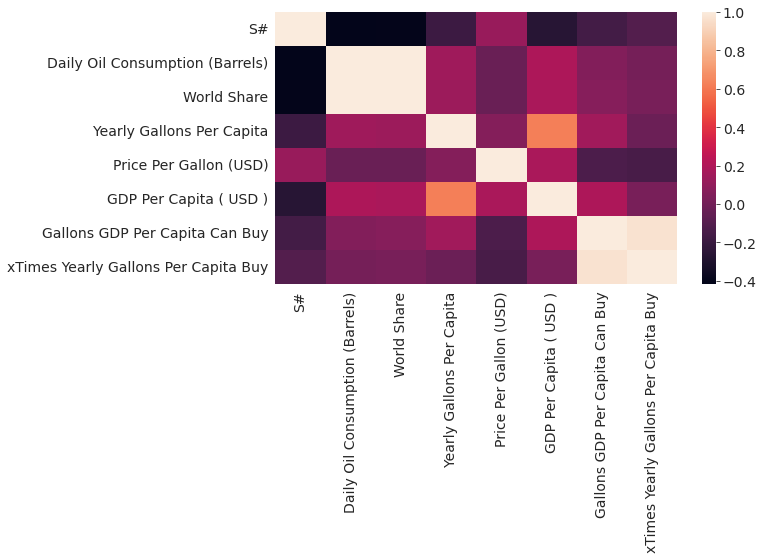

In [193]:
sns.heatmap(df.corr())

#### We see only a strong positive correlation between "GDP per Capita" and "Yearly Gallons per Capita" which is to be expected as the more money people have the more they can consume.

### Let's look at the Daily Oil Consumption of the top 10 countries and visualize it by a Barplot.

<AxesSubplot:xlabel='Daily Oil Consumption (Barrels)', ylabel='Country'>

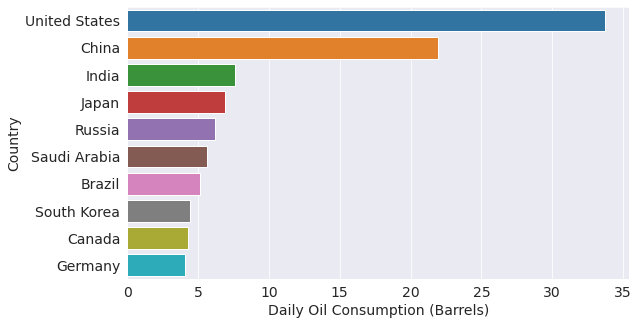

In [194]:
top_consume = df.sort_values(by='Daily Oil Consumption (Barrels)',ascending = False).head(10)
top_consume['Daily Oil Consumption (Barrels)'] = (top_consume['Daily Oil Consumption (Barrels)']*100)/(top_consume['Daily Oil Consumption (Barrels)']).sum()
sns.barplot(x=top_consume['Daily Oil Consumption (Barrels)'],y=top_consume['Country'])

### We see that USA and China consumes more than 50% of the Oil Produced per day. 
>- China and India have a way larger population than USA and the rest of the countries, even then USA consumes more oil than India and China combined.
### India, Japan and shockingly Russia, one of the leading exporter of Oil, account for less than 20% together.

### Now, we explore the Price per Gallon in USD in the top oil consuming countries.

In [195]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Daily Oil Consumption (Barrels)', ylabel='Country'>

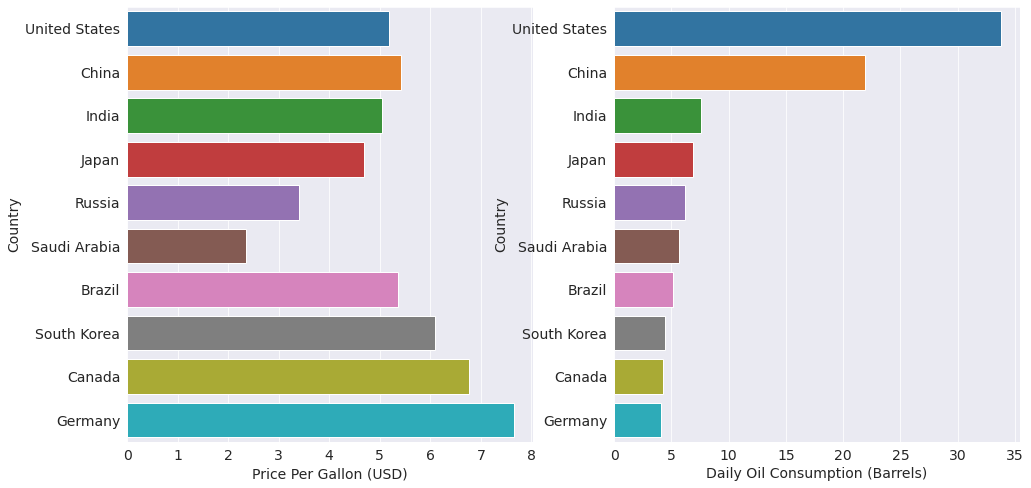

In [196]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
sns.barplot(x = top_consume['Price Per Gallon (USD)'],y = top_consume['Country'],ax = axes[0])
sns.barplot(x=top_consume['Daily Oil Consumption (Barrels)'],y=top_consume['Country'],ax = axes[1])

### We see some interesting facts here. 
> - Saudi Arabia and Russia have the lowest price for oil, owing to the fact that they are leading oil exporters. 
> - Countries like [Brazil,South Korea,Canada and Germany] have high prices and low consumption compared to other countries in the list. 
> - USA has a lower price per gallon than China and is comparable to India, while it's consumption is way more than both China and India combined.

### We now see the GDP of the top consumers

<AxesSubplot:xlabel='Daily Oil Consumption (Barrels)', ylabel='Country'>

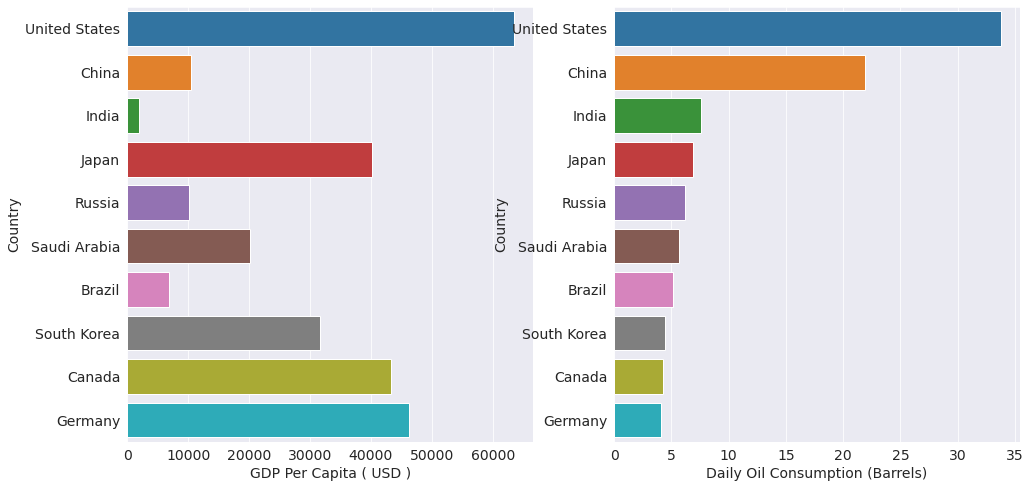

In [197]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
sns.barplot(x = top_consume['GDP Per Capita ( USD )'],y = top_consume['Country'],ax = axes[0])
sns.barplot(x=top_consume['Daily Oil Consumption (Barrels)'],y=top_consume['Country'],ax = axes[1])

### USA has the highest GDP per capita, followed by Germany and Canada, but Canada and Germany do not consume as much oil as USA.
### India and China have low GDP per capita among these countries which could be because of their large population.
### Countries with lower populations are the ones with high GDP per capita.

### Let us see what percentage of their GDP do these countries spend on oil.

In [198]:
top_consume['percentage_gdp_spent_on_oil'] = 100*(top_consume['Yearly Gallons Per Capita']/top_consume['Gallons GDP Per Capita Can Buy'])

<AxesSubplot:xlabel='GDP Per Capita ( USD )', ylabel='Country'>

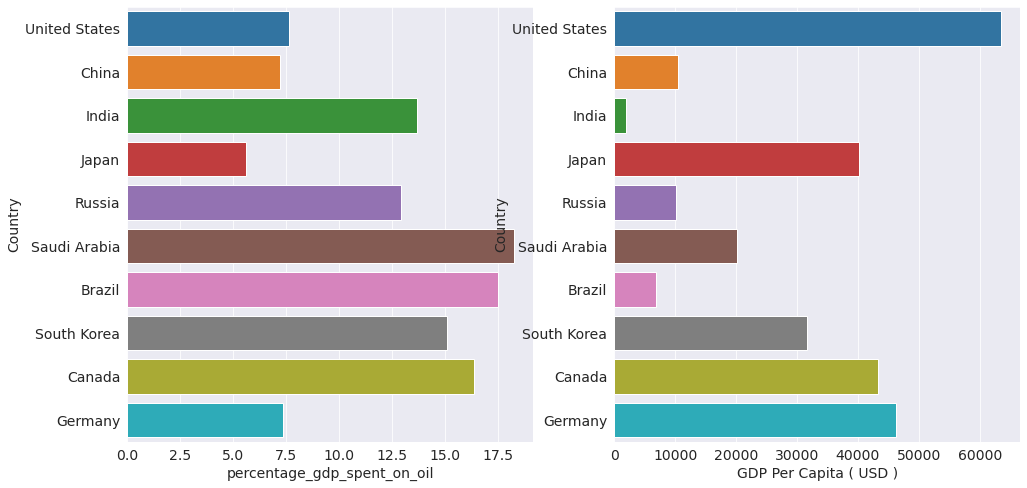

In [199]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
sns.barplot(x = top_consume['percentage_gdp_spent_on_oil'],y = top_consume['Country'],ax = axes[0])
sns.barplot(x=top_consume['GDP Per Capita ( USD )'],y=top_consume['Country'],ax = axes[1])

### We see that Saudi Arabia,Brazil,Canada and India spent the most percentage of their GDP on oil.
### Japan,China,USA and Germnay spend less percentage of their GDP on oil.(But their GDP is also High)

Let us save and upload our work to Jovian before continuing

In [200]:
import jovian

In [201]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "therahulbhagat/petrol-gas-world-prices" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/therahulbhagat/petrol-gas-world-prices


'https://jovian.ai/therahulbhagat/petrol-gas-world-prices'

## Asking and Answering Questions

TODO - write some explanation here.



> Instructions (delete this cell)
>
> - Ask at least 5 interesting questions about your dataset
> - Answer the questions either by computing the results using Numpy/Pandas or by plotting graphs using Matplotlib/Seaborn
> - Create new columns, merge multiple dataset and perform grouping/aggregation wherever necessary
> - Wherever you're using a library function from Pandas/Numpy/Matplotlib etc. explain briefly what it does



### Q1) Which countries have the least GDP per Capita?

In [202]:
least_gdp_capita = df.sort_values(by=['GDP Per Capita ( USD )']).head(20)
least_gdp_capita

,S#,Country,Daily Oil Consumption (Barrels),World Share,Yearly Gallons Per Capita,Price Per Gallon (USD),GDP Per Capita ( USD ),Gallons GDP Per Capita Can Buy,xTimes Yearly Gallons Per Capita Buy
164,165,Burundi,1499,0,2.2,5.09,274,54,24
152,153,Somalia,5600,0,6.1,3.03,309,102,17
114,115,Mozambique,40000,0,22.0,4.94,449,91,4
174,175,Central African Republic,2800,0,9.5,9.06,477,53,6
154,155,Sierra Leone,6500,0,13.6,5.17,485,94,7
130,131,Madagascar,18000,0,11.1,3.86,496,128,12
108,109,Afghanistan,35000,0,15.2,3.62,509,141,9
127,128,DR Congo,21000,0,4.1,4.43,557,126,31
157,158,Liberia,8000,0,26.7,4.90,583,119,4
81,82,Sudan,140000,0,53.9,4.80,596,124,2


Here the sort_values() method is used to sort the 'df' data frame using the column 'GDP per Capita'.

### These above are the 20 countries with least GDP per capita.

### Q2) Which countries have the least daily oil consumption?

In [203]:
least_consume = df.sort_values(by=['Daily Oil Consumption (Barrels)']).head(20)
least_consume

,S#,Country,Daily Oil Consumption (Barrels),World Share,Yearly Gallons Per Capita,Price Per Gallon (USD),GDP Per Capita ( USD ),Gallons GDP Per Capita Can Buy,xTimes Yearly Gallons Per Capita Buy
177,178,Niue,51,0,484.4,11.43,15586,1364,3
170,171,Saint Helena,70,0,180.2,5.53,7800,1410,8
179,180,Montserrat,400,0,1231.1,4.57,12589,2755,2
171,172,Kiribati,400,0,54.5,4.09,1671,409,7
178,179,Saint Pierre & Miquelon,660,0,1705.1,8.27,34900,4220,2
180,181,Tonga,899,0,136.3,16.20,4903,303,2
169,170,Vanuatu,1100,0,60.6,4.92,2783,566,9
165,166,British Virgin Islands,1240,0,647.6,3.60,34246,9513,15
168,169,Comoros,1300,0,25.0,5.15,1403,272,11
175,176,Dominica,1301,0,279.7,4.78,7268,1521,5


### Q3) Which countries belong to both the least gdp per capita group and least oil consumption group?

In [204]:
list1 = list(set(least_consume.Country)&set(least_gdp_capita.Country))
least_gdp_consume = df[df.Country.isin(list1)]

In [205]:
least_gdp_consume

,S#,Country,Daily Oil Consumption (Barrels),World Share,Yearly Gallons Per Capita,Price Per Gallon (USD),GDP Per Capita ( USD ),Gallons GDP Per Capita Can Buy,xTimes Yearly Gallons Per Capita Buy
152,153,Somalia,5600,0,6.1,3.03,309,102,17
160,161,Lesotho,5001,0,36.9,5.68,861,152,4
164,165,Burundi,1499,0,2.2,5.09,274,54,24
173,174,Gambia,3800,0,27.1,5.04,787,156,6
174,175,Central African Republic,2800,0,9.5,9.06,477,53,6


### These are the set of countries with both the least GDP per capita and least oil consumption.

### Q4) Which countries pay the most for a gallon of oil?

In [206]:
most_priced = df.sort_values(by = ['Price Per Gallon (USD)'],ascending = False).head(20)
most_priced

,S#,Country,Daily Oil Consumption (Barrels),World Share,Yearly Gallons Per Capita,Price Per Gallon (USD),GDP Per Capita ( USD ),Gallons GDP Per Capita Can Buy,xTimes Yearly Gallons Per Capita Buy
147,148,North Korea,18000,0,10.9,54.89,1300,24,2
180,181,Tonga,899,0,136.3,16.20,4903,303,2
177,178,Niue,51,0,484.4,11.43,15586,1364,3
40,41,Hong Kong,408491,0,864.5,11.35,46324,4081,5
58,59,Norway,204090,0,595.8,10.22,67390,6594,11
53,54,Denmark,158194,0,424.6,10.04,61063,6082,14
63,64,Finland,210030,0,585.7,10.01,48773,4872,8
141,142,Iceland,19090,0,880.9,9.83,59270,6030,7
47,48,Greece,296101,0,427.6,9.49,17623,1857,4
22,23,Netherlands,937098,1,846.0,9.33,52397,5616,7


### We have the list of countries that pay the most for a gallon of oil.
### North Korea pays the most, almost 10 times more than USA and India.

### Q5) Which among the countries with the highest price for oil, consumes the most oil daily?

In [207]:
most_priced_most_consume = most_priced.sort_values(by=['Daily Oil Consumption (Barrels)'],ascending=False).head(10)
most_priced_most_consume

,S#,Country,Daily Oil Consumption (Barrels),World Share,Yearly Gallons Per Capita,Price Per Gallon (USD),GDP Per Capita ( USD ),Gallons GDP Per Capita Can Buy,xTimes Yearly Gallons Per Capita Buy
14,15,United Kingdom,1583896,2,366.2,8.38,41125,4908,13
15,16,Singapore,1357000,1,3679.5,8.71,59798,6865,2
17,18,Spain,1290063,1,424.1,8.35,27063,3241,8
22,23,Netherlands,937098,1,846.0,9.33,52397,5616,7
28,29,Belgium,631522,1,852.6,8.36,45159,5402,6
40,41,Hong Kong,408491,0,864.5,11.35,46324,4081,5
43,44,Sweden,322109,0,502.0,8.70,52274,6009,12
47,48,Greece,296101,0,427.6,9.49,17623,1857,4
64,65,Portugal,236866,0,351.7,8.55,22176,2594,7
63,64,Finland,210030,0,585.7,10.01,48773,4872,8


### As we can see, UK, Singapore and Spain are the ones with the most consumption even after the high prices.

Let us save and upload our work to Jovian before continuing.

In [208]:
import jovian

In [209]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "therahulbhagat/petrol-gas-world-prices" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/therahulbhagat/petrol-gas-world-prices


'https://jovian.ai/therahulbhagat/petrol-gas-world-prices'

## Inferences and Conclusion
> - We see only a strong positive correlation between "GDP per Capita" and "Yearly Gallons per Capita" which is to be expected as the more money people have the more they can consume.
> - We see that USA and China consumes more than 50% of the Oil Produced per day. 
> - China and India have a way larger population than USA and the rest of the countries, even then USA consumes more oil than India and China combined.
> - India, Japan and shockingly Russia, one of the leading exporter of Oil, account for less than 20% together.
> - Saudi Arabia and Russia have the lowest price for oil, owing to the fact that they are leading oil exporters. 
> - Countries like [Brazil,South Korea,Canada and Germany] have high prices and low consumption compared to other countries in the list. 
> - USA has a lower price per gallon than China and is comparable to India, while it's consumption is way more than both China and India combined.
> - USA has the highest GDP per capita, followed by Germany and Canada, but Canada and Germany do not consume as much oil as USA.
> - India and China have low GDP per capita among these countries which could be because of their large population.
> - Countries with lower populations are the ones with high GDP per capita.
> - We see that Saudi Arabia,Brazil,Canada and India spent the most percentage of their GDP on oil.
> - Japan,China,USA and Germany spend less percentage of their GDP on oil.(But their GDP is also High)
> - North Korea pays the most, almost 10 times more than USA and India.
> - UK, Singapore and Spain are the ones with the most consumption even after the high prices.

In [210]:
import jovian

In [211]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "therahulbhagat/petrol-gas-world-prices" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/therahulbhagat/petrol-gas-world-prices


'https://jovian.ai/therahulbhagat/petrol-gas-world-prices'

## References and Future Work

#### This dataset can be merged with a population dataset to get more results. This dataset can be used to by the oil-price controllers(Russia,Saudi Arabia,etc) to manage the global oil trade better. This dataset can give us a measure regarding the skewness of the consumption of oil by developed countries, even though their population are not that high.

In [214]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>